In [5]:
import numpy as np  
from scipy import math
from scipy.integrate import odeint
import matplotlib.pylab as plt

In [6]:
def rpode(y,t):
    #shape of the y variable
    #y=[Rb,Ub,x_N=1,x_N=2,x_N=3,...,x_N=N,
    #         y_N=1,y_N=2,y_N=3,...,y_N=N,
    #         u_N=1,u_N=2,u_N=3,...,u_N=N,
    #         v_N=1,v_N=2,v_N=3,...,v_N=N]

    #calculate the bubble pulsation (assume all are of the same size)
    Rb=y[0]
    Ub=y[1]
    deltap=(pinf+2.*sigma/r0)*(r0/Rb)**(3.*kappa)\
        -pinf-2.*sigma/Rb-4.*mu/Rb*Ub\
        -pa*np.sin(2.*np.pi*f*t)
    Ab=1./(Rb)*(deltap/rho-1.5*Ub*Ub)
    
    V1dot=4.*np.pi*Rb*Rb*Ub
    ub=y[2+2*N:] #velocity of the bubbles
    ab=np.zeros([N,2]) #acceleration which has to be calculated
    
    for i in range(0,N):
        Fbjerk_x=0.
        Fbjerk_y=0.
        for j in range(0,N):
            if (i!=j):
                dist=np.sqrt((y[i+2]-y[j+2])**2.+(y[i+N+2]-y[j+N+2])**2.)
                alpha=(dist>3.*Rb)*1. #cut off if too close
                Fbjerk_x=Fbjerk_x+(y[j+2]-y[i+2])/(dist**3.)*V1dot*V1dot*alpha
                Fbjerk_y=Fbjerk_y+(y[j+N+2]-y[i+N+2])/(dist**3.)*V1dot*V1dot*alpha
        Fbjerk_x=3./8./np.pi/np.pi*Fbjerk_x
        Fbjerk_y=3./8./np.pi/np.pi*Fbjerk_y
        ab[i,0]=(Fbjerk_x-18.*mu/rho*Rb*y[2+2*N+i]-3.*Rb*Rb*Ub*y[2+2*N+i])/Rb/Rb/Rb
        ab[i,1]=(Fbjerk_y-18.*mu/rho*Rb*y[2+3*N+i]-3.*Rb*Rb*Ub*y[2+3*N+i])/Rb/Rb/Rb
                
    return np.append([y[1],Ab],[ub,ab.T.flatten()])


In [43]:
%matplotlib inline
rho=1e3
pinf=1e5
pa=.3e5
sigma=0.072
#sigma=0
kappa=1.4
r0=3e-6
f=1.1e6
mu=1e-3
N=10

#Initial conditions
yinit=np.array([r0,0.])
pos=np.zeros([N,2])
vel=np.zeros([N,2])#initial velocities remain 0

#Linear Array
deltal=2e-5 #x-spacing between two bubbles
pos[:,0]=np.linspace(0.,(N-1.)*deltal,N)
pos[:,1]=0.

#Circle
#theta=np.linspace(0,2.*np.pi,N,endpoint=False)
#Rc=3e-5
#pos[:,0]=Rc*np.cos(theta)
#pos[:,1]=Rc*np.sin(theta)

#2D Array
#delta=2e-5
#nx=3
#ny=3
#for i in range(nx):
#    for j in range(ny):
#        pos[i*nx+j,0]=delta*i
#        pos[i*nx+j,1]=delta*j
        
#Linear Array with some wiggle
#dy=5e-5
#dx=1e-5
#pos[:,0]=dx*np.cos(np.linspace(0.,1.,N)*4.*np.pi)
#pos[:,1]=np.linspace(0.,dy*N,N,endpoint=False)

tspan=20./f
t=np.linspace(0.,tspan,5000)
#calc transient
y=odeint(rpode,np.append(yinit,[pos.T.flatten(),vel.T.flatten()]),np.linspace(0.,tspan,5000))
Rb=y[:,0]
Ub=y[:,1]







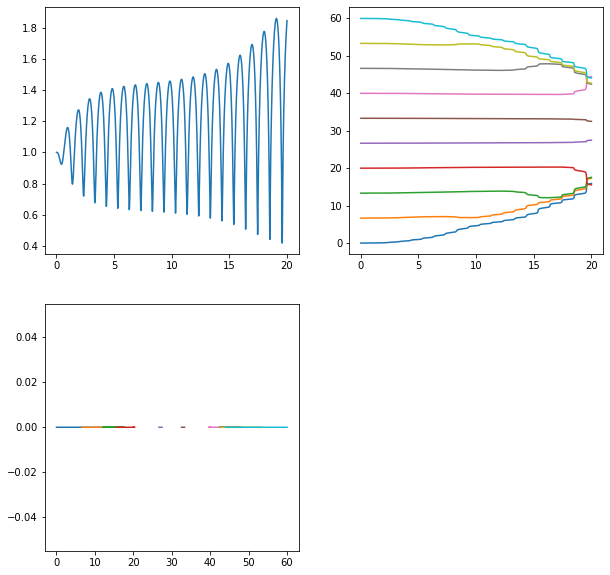

In [44]:
plt.figure(figsize=(10,10))
plt.subplot2grid((2,2),(0,0), colspan=1, rowspan=1)
plt.plot(t*f, Rb/r0)

plt.subplot2grid((2,2),(0,1), colspan=1, rowspan=1)
for i in range(N):
    plt.plot(t*f,y[:,2+i]/r0)
plt.subplot2grid((2,2),(1,0), colspan=1, rowspan=1)
for i in range(N):
    plt.plot(y[:,2+i]/r0,y[:,2+N+i]/r0)